In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

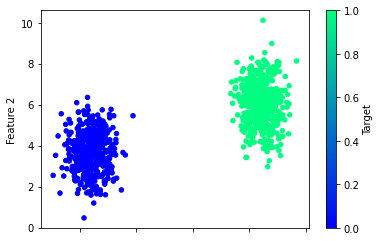

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [10]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [11]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [13]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.7386 - accuracy: 0.1573
Epoch 2/100
750/750 [==============================] - 0s 53us/sample - loss: 0.7297 - accuracy: 0.0053
Epoch 3/100
750/750 [==============================] - 0s 55us/sample - loss: 0.7220 - accuracy: 0.0133
Epoch 4/100
750/750 [==============================] - 0s 56us/sample - loss: 0.7157 - accuracy: 0.0227
Epoch 5/100
750/750 [==============================] - 0s 69us/sample - loss: 0.7101 - accuracy: 0.0453
Epoch 6/100
750/750 [==============================] - 0s 54us/sample - loss: 0.7055 - accuracy: 0.1000
Epoch 7/100
750/750 [==============================] - 0s 52us/sample - loss: 0.7014 - accuracy: 0.1800
Epoch 8/100
750/750 [==============================] - 0s 52us/sample - loss: 0.6979 - accuracy: 0.3733
Epoch 9/100
750/750 [==============================] - 0s 54us/sample - loss: 0.6947 - accuracy: 0.5053
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 54us/sample - loss: 0.1268 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 52us/sample - loss: 0.1245 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 49us/sample - loss: 0.1222 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 50us/sample - loss: 0.1200 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 49us/sample - loss: 0.1179 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 50us/sample - loss: 0.1157 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 49us/sample - loss: 0.1137 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 50us/sample - loss: 0.1117 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 48us/sample - loss: 0.1098 - accuracy: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 49us/samp

<AxesSubplot:>

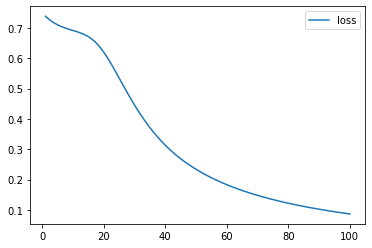

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

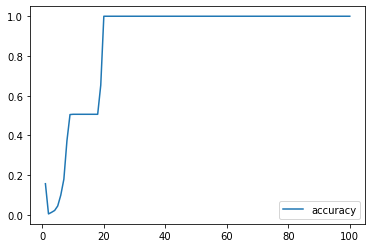

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.0778 - accuracy: 1.0000
Loss: 0.08928124922513962, Accuracy: 1.0


In [17]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

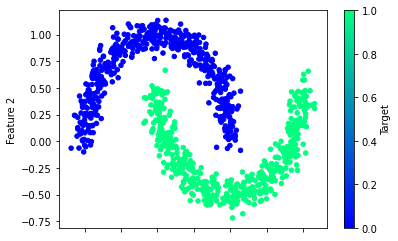

In [18]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 109us/sample - loss: 0.8552 - accuracy: 0.5613
Epoch 2/100
750/750 [==============================] - 0s 59us/sample - loss: 0.7891 - accuracy: 0.5720
Epoch 3/100
750/750 [==============================] - 0s 55us/sample - loss: 0.7402 - accuracy: 0.5840
Epoch 4/100
750/750 [==============================] - 0s 57us/sample - loss: 0.7065 - accuracy: 0.6027
Epoch 5/100
750/750 [==============================] - 0s 56us/sample - loss: 0.6799 - accuracy: 0.6120
Epoch 6/100
750/750 [==============================] - 0s 59us/sample - loss: 0.6592 - accuracy: 0.6187
Epoch 7/100
750/750 [==============================] - 0s 57us/sample - loss: 0.6413 - accuracy: 0.6293
Epoch 8/100
750/750 [==============================] - 0s 60us/sample - loss: 0.6266 - accuracy: 0.6387
Epoch 9/100
750/750 [==============================] - 0s 56us/sample - loss: 0.6135 - accuracy: 0.6467
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 59us/sample - loss: 0.2950 - accuracy: 0.8653
Epoch 79/100
750/750 [==============================] - 0s 63us/sample - loss: 0.2936 - accuracy: 0.8680
Epoch 80/100
750/750 [==============================] - 0s 62us/sample - loss: 0.2923 - accuracy: 0.8680
Epoch 81/100
750/750 [==============================] - 0s 50us/sample - loss: 0.2912 - accuracy: 0.8680
Epoch 82/100
750/750 [==============================] - 0s 50us/sample - loss: 0.2898 - accuracy: 0.8680
Epoch 83/100
750/750 [==============================] - 0s 50us/sample - loss: 0.2885 - accuracy: 0.8680
Epoch 84/100
750/750 [==============================] - 0s 55us/sample - loss: 0.2874 - accuracy: 0.8680
Epoch 85/100
750/750 [==============================] - 0s 56us/sample - loss: 0.2863 - accuracy: 0.8693
Epoch 86/100
750/750 [==============================] - 0s 50us/sample - loss: 0.2853 - accuracy: 0.8693
Epoch 87/100
750/750 [==============================] - 0s 50us/samp

<AxesSubplot:>

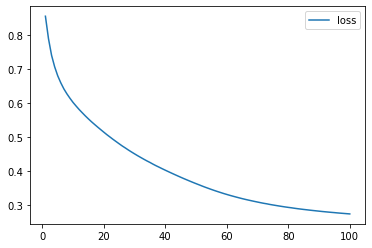

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

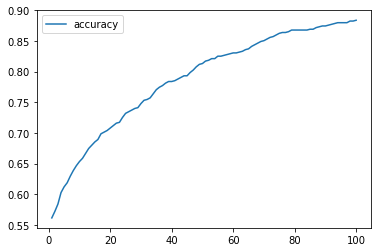

In [22]:
# Plot the loss
history_df.plot(y="accuracy")

In [23]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [24]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.8748 - accuracy: 0.4693
Epoch 2/100
750/750 [==============================] - 0s 62us/sample - loss: 0.8225 - accuracy: 0.4693
Epoch 3/100
750/750 [==============================] - 0s 79us/sample - loss: 0.7766 - accuracy: 0.4693
Epoch 4/100
750/750 [==============================] - 0s 66us/sample - loss: 0.7398 - accuracy: 0.4693
Epoch 5/100
750/750 [==============================] - 0s 61us/sample - loss: 0.7084 - accuracy: 0.4720
Epoch 6/100
750/750 [==============================] - 0s 59us/sample - loss: 0.6811 - accuracy: 0.4747
Epoch 7/100
750/750 [==============================] - 0s 63us/sample - loss: 0.6565 - accuracy: 0.4840
Epoch 8/100
750/750 [==============================] - 0s 66us/sample - loss: 0.6340 - accuracy: 0.4973
Epoch 9/100
750/750 [==============================] - 0s 63us/sample - loss: 0.6135 - accuracy: 0.5107
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 90us/sample - loss: 0.2996 - accuracy: 0.9040
Epoch 79/100
750/750 [==============================] - 0s 68us/sample - loss: 0.2984 - accuracy: 0.9067
Epoch 80/100
750/750 [==============================] - 0s 61us/sample - loss: 0.2972 - accuracy: 0.9053
Epoch 81/100
750/750 [==============================] - 0s 58us/sample - loss: 0.2959 - accuracy: 0.9040
Epoch 82/100
750/750 [==============================] - 0s 59us/sample - loss: 0.2948 - accuracy: 0.9040
Epoch 83/100
750/750 [==============================] - 0s 60us/sample - loss: 0.2936 - accuracy: 0.9040
Epoch 84/100
750/750 [==============================] - 0s 60us/sample - loss: 0.2924 - accuracy: 0.9027
Epoch 85/100
750/750 [==============================] - 0s 59us/sample - loss: 0.2913 - accuracy: 0.9040
Epoch 86/100
750/750 [==============================] - 0s 60us/sample - loss: 0.2902 - accuracy: 0.9027
Epoch 87/100
750/750 [==============================] - 0s 57us/samp